<a href="https://colab.research.google.com/github/rohitverma92outlook/Machine-Learning/blob/main/Tabular%20Playground%20Series%20Mar%202021/Tabular_Playground_Series_Mar_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_score,recall_score,roc_curve,roc_auc_score,accuracy_score,plot_roc_curve,auc
from sklearn.metrics import precision_recall_curve
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ds_train = pd.read_csv("/content/drive/MyDrive/Tabular Playground Series Mar 2021/train.csv")
ds_test = pd.read_csv("/content/drive/MyDrive/Tabular Playground Series Mar 2021/test.csv")

In [ ]:
pd.set_option("display.max_columns",None)

In [ ]:
ds_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


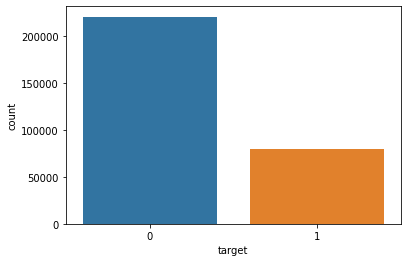

In [ ]:
sb.countplot(ds_train.target)
plt.show()

In [ ]:
ds_train["target"].value_counts()

0    220539
1     79461
Name: target, dtype: int64

In [ ]:
ds_train.shape

(300000, 32)

In [ ]:
ds_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,A,LF,A,A,A,A,B,D,D,B,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,A,MC,A,A,A,B,D,B,D,B,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,A,FN,A,A,A,B,B,D,D,B,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,A,HK,A,A,A,A,B,D,B,B,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,A,HX,A,A,A,A,D,D,D,B,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [ ]:
ds_test.shape

(200000, 31)

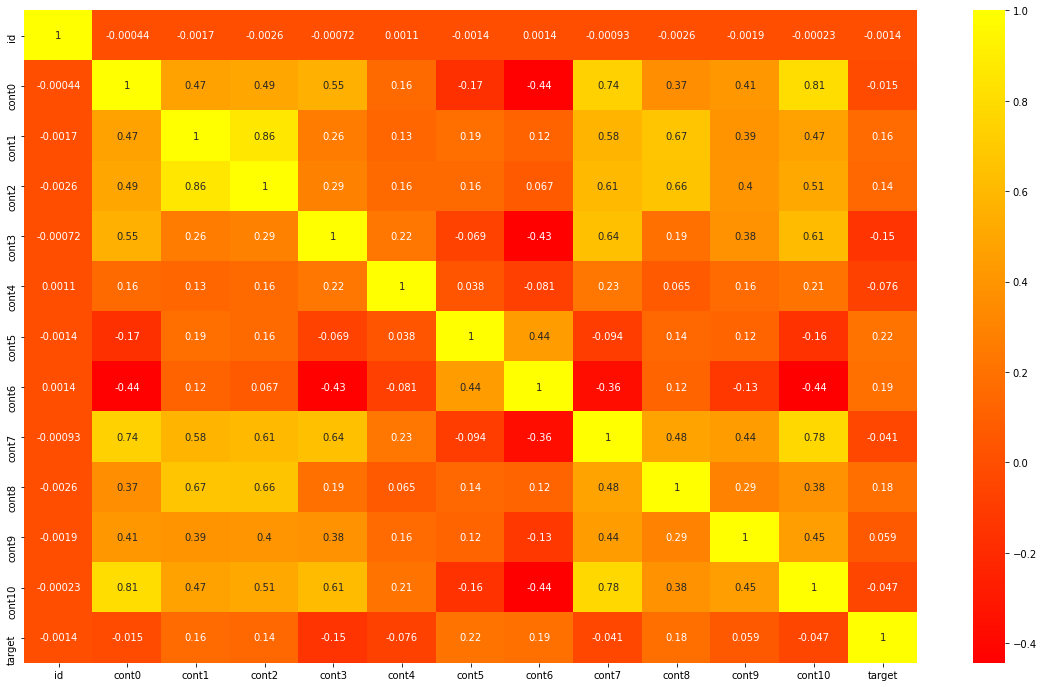

In [ ]:
plt.figure(figsize=(20,12))
heatmap = sb.heatmap(ds_train.corr(), annot=True, cmap="autumn")
plt.show()

In [ ]:
def null_values(dataset):
    for keys, values in dict(dataset.isna().sum()).items():
        if values!=0:
            print(keys,values)
        else:
            print("No null values found")

In [ ]:
null_values(ds_train)

No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found


In [ ]:
null_values(ds_test)

No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found
No null values found


In [ ]:
#pd.set_option("display.max_rows",None)
def value_count (dataset):    
    for col in dataset.iloc[:,1:20]:
        print(col)
        value_count = dataset[col].value_counts().sort_index()
        print(value_count)
        print("Unique Values Number : " ,len(dataset[col].value_counts().sort_index()))
        print()

In [ ]:
value_count(ds_train)

cat0
A    223525
B     76475
Name: cat0, dtype: int64
Unique Values Number :  2

cat1
A    10547
B     6847
C     1703
D      414
E      235
F    43818
G    11248
H    17257
I    90809
J    10036
K    41870
L    31891
M    11354
N    13231
O     8740
Name: cat1, dtype: int64
Unique Values Number :  15

cat2
A    168694
B       218
C     38875
D     22720
E       110
F      9877
G     18225
H       219
I      5287
J      9102
K       126
L      3997
M      8068
N       340
O      2749
Q     10901
R       129
S       197
U       166
Name: cat2, dtype: int64
Unique Values Number :  19

cat3
A    187251
B     79951
C     15957
D      8676
E      3318
F      2489
G       372
H       274
I       177
J       286
K       846
L       292
N       111
Name: cat3, dtype: int64
Unique Values Number :  13

cat4
A        92
B       301
C       506
D     27919
E    129385
F     76678
G     30754
H     23388
I      3241
J      4307
K      1481
L       214
M       547
N        81
O       330
P       100

In [ ]:
value_count(ds_test)

cat0
A    149023
B     50977
Name: cat0, dtype: int64
Unique Values Number :  2

cat1
A     7256
B     4522
C     1164
D      310
E      140
F    29123
G     7497
H    11547
I    60152
J     6657
K    28221
L    21207
M     7709
N     8717
O     5778
Name: cat1, dtype: int64
Unique Values Number :  15

cat2
A    112465
B       161
C     25683
D     15113
E        77
F      6538
G     12284
H       139
I      3630
J      6107
K        79
L      2702
M      5461
N       248
O      1799
Q      7195
R        78
S       124
U       117
Name: cat2, dtype: int64
Unique Values Number :  19

cat3
A    124506
B     53476
C     10600
D      5918
E      2130
F      1687
G       251
H       199
I       146
J       197
K       609
L       203
N        78
Name: cat3, dtype: int64
Unique Values Number :  13

cat4
A       50
B      183
C      348
D    18882
E    86073
F    51016
G    20496
H    15621
I     2075
J     2974
K      987
L      130
M      409
N       60
O      240
P       68
Q       57
R   

In [ ]:
elements = set()

for col_train in ds_train.iloc[:,1:20]:
    unique_value_train = ds_train[col_train].unique()
    for j in unique_value_train:
        elements.add(j)

for col_test in ds_test.iloc[:,1:20]:
    unique_value_test = ds_test[col_test].unique()
    for k in unique_value_test:
        elements.add(k)

keys=sorted(elements)

In [ ]:
elements

{'A',
 'AA',
 'AB',
 'AC',
 'AD',
 'AE',
 'AF',
 'AG',
 'AH',
 'AI',
 'AJ',
 'AK',
 'AL',
 'AM',
 'AN',
 'AO',
 'AP',
 'AQ',
 'AR',
 'AS',
 'AT',
 'AU',
 'AV',
 'AW',
 'AX',
 'AY',
 'B',
 'BA',
 'BB',
 'BC',
 'BD',
 'BE',
 'BF',
 'BG',
 'BH',
 'BI',
 'BJ',
 'BK',
 'BL',
 'BM',
 'BN',
 'BO',
 'BP',
 'BQ',
 'BR',
 'BS',
 'BT',
 'BU',
 'BV',
 'BW',
 'BX',
 'BY',
 'C',
 'CA',
 'CB',
 'CC',
 'CD',
 'CE',
 'CF',
 'CG',
 'CH',
 'CI',
 'CJ',
 'CK',
 'CL',
 'CM',
 'CN',
 'CO',
 'CP',
 'CQ',
 'CR',
 'CS',
 'CT',
 'CU',
 'CW',
 'CX',
 'CY',
 'D',
 'DA',
 'DC',
 'DD',
 'DE',
 'DF',
 'DG',
 'DH',
 'DI',
 'DJ',
 'DK',
 'DL',
 'DM',
 'DN',
 'DO',
 'DP',
 'DQ',
 'DR',
 'DS',
 'DT',
 'DU',
 'DV',
 'DW',
 'DX',
 'DY',
 'E',
 'EA',
 'EB',
 'EC',
 'ED',
 'EE',
 'EF',
 'EG',
 'EH',
 'EI',
 'EJ',
 'EK',
 'EL',
 'EN',
 'EO',
 'EP',
 'EQ',
 'ES',
 'EU',
 'EV',
 'EW',
 'EY',
 'F',
 'FA',
 'FB',
 'FC',
 'FD',
 'FE',
 'FF',
 'FG',
 'FH',
 'FI',
 'FJ',
 'FK',
 'FL',
 'FM',
 'FN',
 'FO',
 'FP',
 'FQ',
 'FR',
 'FS'

In [ ]:
type(keys)

list

In [ ]:
len(keys)

324

In [ ]:
print(keys)

['A', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN', 'AO', 'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'B', 'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK', 'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BR', 'BS', 'BT', 'BU', 'BV', 'BW', 'BX', 'BY', 'C', 'CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG', 'CH', 'CI', 'CJ', 'CK', 'CL', 'CM', 'CN', 'CO', 'CP', 'CQ', 'CR', 'CS', 'CT', 'CU', 'CW', 'CX', 'CY', 'D', 'DA', 'DC', 'DD', 'DE', 'DF', 'DG', 'DH', 'DI', 'DJ', 'DK', 'DL', 'DM', 'DN', 'DO', 'DP', 'DQ', 'DR', 'DS', 'DT', 'DU', 'DV', 'DW', 'DX', 'DY', 'E', 'EA', 'EB', 'EC', 'ED', 'EE', 'EF', 'EG', 'EH', 'EI', 'EJ', 'EK', 'EL', 'EN', 'EO', 'EP', 'EQ', 'ES', 'EU', 'EV', 'EW', 'EY', 'F', 'FA', 'FB', 'FC', 'FD', 'FE', 'FF', 'FG', 'FH', 'FI', 'FJ', 'FK', 'FL', 'FM', 'FN', 'FO', 'FP', 'FQ', 'FR', 'FS', 'FT', 'FV', 'FW', 'FX', 'G', 'GA', 'GB', 'GC', 'GD', 'GE', 'GF', 'GG', 'GH', 'GI', 'GJ', 'GK', 'GL', 'GM', 'GN', 'GQ', 'GR', 'GS', 'GT', 'GU'

In [ ]:
#values = list(range(1,325))
values = list(np.linspace(0.1,0.650,num=324))

In [ ]:
len(values)

324

In [ ]:
print(values)

[0.1, 0.10170278637770898, 0.10340557275541797, 0.10510835913312694, 0.10681114551083593, 0.1085139318885449, 0.11021671826625387, 0.11191950464396286, 0.11362229102167183, 0.1153250773993808, 0.11702786377708979, 0.11873065015479876, 0.12043343653250775, 0.12213622291021672, 0.12383900928792571, 0.12554179566563467, 0.12724458204334366, 0.12894736842105264, 0.13065015479876163, 0.1323529411764706, 0.13405572755417958, 0.13575851393188854, 0.13746130030959752, 0.1391640866873065, 0.1408668730650155, 0.14256965944272448, 0.14427244582043344, 0.14597523219814243, 0.1476780185758514, 0.14938080495356038, 0.15108359133126936, 0.15278637770897835, 0.1544891640866873, 0.1561919504643963, 0.15789473684210528, 0.15959752321981424, 0.16130030959752323, 0.16300309597523222, 0.1647058823529412, 0.16640866873065016, 0.16811145510835915, 0.1698142414860681, 0.1715170278637771, 0.17321981424148608, 0.17492260061919507, 0.17662538699690405, 0.178328173374613, 0.18003095975232197, 0.18173374613003096,

In [ ]:
encode = dict(zip(keys, values))

In [ ]:
encode

{'A': 0.1,
 'AA': 0.10170278637770898,
 'AB': 0.10340557275541797,
 'AC': 0.10510835913312694,
 'AD': 0.10681114551083593,
 'AE': 0.1085139318885449,
 'AF': 0.11021671826625387,
 'AG': 0.11191950464396286,
 'AH': 0.11362229102167183,
 'AI': 0.1153250773993808,
 'AJ': 0.11702786377708979,
 'AK': 0.11873065015479876,
 'AL': 0.12043343653250775,
 'AM': 0.12213622291021672,
 'AN': 0.12383900928792571,
 'AO': 0.12554179566563467,
 'AP': 0.12724458204334366,
 'AQ': 0.12894736842105264,
 'AR': 0.13065015479876163,
 'AS': 0.1323529411764706,
 'AT': 0.13405572755417958,
 'AU': 0.13575851393188854,
 'AV': 0.13746130030959752,
 'AW': 0.1391640866873065,
 'AX': 0.1408668730650155,
 'AY': 0.14256965944272448,
 'B': 0.14427244582043344,
 'BA': 0.14597523219814243,
 'BB': 0.1476780185758514,
 'BC': 0.14938080495356038,
 'BD': 0.15108359133126936,
 'BE': 0.15278637770897835,
 'BF': 0.1544891640866873,
 'BG': 0.1561919504643963,
 'BH': 0.15789473684210528,
 'BI': 0.15959752321981424,
 'BJ': 0.161300309

In [ ]:
ds_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [ ]:
for col in ds_train.iloc[:,1:20]:
    ds_train[col] = ds_train[col].replace(encode)

In [ ]:
for col in ds_test.iloc[:,1:20]:
    ds_test[col] = ds_test[col].replace(encode)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


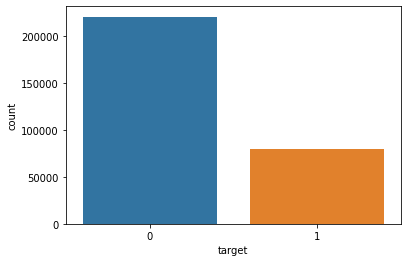

In [ ]:
sb.countplot(ds_train.target)
plt.show()

In [ ]:
state = np.random.RandomState(0)
X1 = ds_train.iloc[:,:-1]
y1 = ds_train.iloc[:,-1]

smk = SMOTETomek(random_state=0)
X,y=smk.fit_resample(X1,y1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


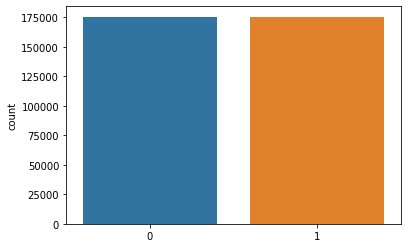

In [ ]:
sb.countplot(y)
plt.show()

In [ ]:
ds_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0.1,0.432043,0.100000,0.144272,0.144272,0.159598,0.100000,0.638080,0.634675,0.100000,0.576780,0.1,0.100000,0.1,0.100000,0.144272,0.231115,0.231115,0.144272,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,0.1,0.432043,0.100000,0.100000,0.273684,0.159598,0.512074,0.644892,0.106811,0.311146,0.408204,0.1,0.144272,0.1,0.144272,0.231115,0.144272,0.231115,0.144272,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,0.1,0.512074,0.100000,0.100000,0.273684,0.159598,0.100000,0.273684,0.166409,0.552941,0.246440,0.1,0.144272,0.1,0.100000,0.144272,0.231115,0.231115,0.144272,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,0.1,0.512074,0.100000,0.188545,0.273684,0.159598,0.100000,0.648297,0.106811,0.311146,0.547833,0.1,0.100000,0.1,0.100000,0.144272,0.231115,0.231115,0.144272,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,0.1,0.432043,0.352012,0.144272,0.273684,0.159598,0.188545,0.352012,0.634675,0.100000,0.256656,0.1,0.100000,0.1,0.144272,0.144272,0.144272,0.231115,0.144272,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [ ]:
ds_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,0.100000,0.311146,0.100000,0.100000,0.311146,0.159598,0.100000,0.113622,0.140867,0.1,0.561455,0.1,0.1,0.1,0.100000,0.144272,0.231115,0.231115,0.144272,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,0.100000,0.392879,0.188545,0.100000,0.273684,0.103406,0.432043,0.311146,0.629567,0.1,0.597214,0.1,0.1,0.1,0.144272,0.231115,0.144272,0.231115,0.144272,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,0.100000,0.629567,0.188545,0.100000,0.311146,0.103406,0.100000,0.113622,0.149381,0.1,0.334985,0.1,0.1,0.1,0.144272,0.144272,0.231115,0.231115,0.144272,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,0.144272,0.552941,0.188545,0.100000,0.311146,0.159598,0.100000,0.273684,0.140867,0.1,0.409907,0.1,0.1,0.1,0.100000,0.144272,0.231115,0.144272,0.144272,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,0.100000,0.311146,0.100000,0.144272,0.311146,0.159598,0.100000,0.113622,0.432043,0.1,0.428638,0.1,0.1,0.1,0.100000,0.231115,0.231115,0.231115,0.144272,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [ ]:
#ds_train.drop(columns="id",axis=1,inplace=True)
#ds_test.drop(columns="id",axis=1,inplace=True)

In [ ]:
ds_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0.1,0.432043,0.100000,0.144272,0.144272,0.159598,0.100000,0.638080,0.634675,0.100000,0.576780,0.1,0.100000,0.1,0.100000,0.144272,0.231115,0.231115,0.144272,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,0.1,0.432043,0.100000,0.100000,0.273684,0.159598,0.512074,0.644892,0.106811,0.311146,0.408204,0.1,0.144272,0.1,0.144272,0.231115,0.144272,0.231115,0.144272,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,0.1,0.512074,0.100000,0.100000,0.273684,0.159598,0.100000,0.273684,0.166409,0.552941,0.246440,0.1,0.144272,0.1,0.100000,0.144272,0.231115,0.231115,0.144272,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,0.1,0.512074,0.100000,0.188545,0.273684,0.159598,0.100000,0.648297,0.106811,0.311146,0.547833,0.1,0.100000,0.1,0.100000,0.144272,0.231115,0.231115,0.144272,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,0.1,0.432043,0.352012,0.144272,0.273684,0.159598,0.188545,0.352012,0.634675,0.100000,0.256656,0.1,0.100000,0.1,0.144272,0.144272,0.144272,0.231115,0.144272,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [ ]:
ds_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,0.100000,0.311146,0.100000,0.100000,0.311146,0.159598,0.100000,0.113622,0.140867,0.1,0.561455,0.1,0.1,0.1,0.100000,0.144272,0.231115,0.231115,0.144272,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,0.100000,0.392879,0.188545,0.100000,0.273684,0.103406,0.432043,0.311146,0.629567,0.1,0.597214,0.1,0.1,0.1,0.144272,0.231115,0.144272,0.231115,0.144272,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,0.100000,0.629567,0.188545,0.100000,0.311146,0.103406,0.100000,0.113622,0.149381,0.1,0.334985,0.1,0.1,0.1,0.144272,0.144272,0.231115,0.231115,0.144272,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,0.144272,0.552941,0.188545,0.100000,0.311146,0.159598,0.100000,0.273684,0.140867,0.1,0.409907,0.1,0.1,0.1,0.100000,0.144272,0.231115,0.144272,0.144272,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,0.100000,0.311146,0.100000,0.144272,0.311146,0.159598,0.100000,0.113622,0.432043,0.1,0.428638,0.1,0.1,0.1,0.100000,0.231115,0.231115,0.231115,0.144272,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [ ]:
X_test = ds_test.iloc[:,:].values

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y,random_state=0)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

### Calculating best Hyper parameter for X G Boost using Randimized Search

In [ ]:
parameters = {
               "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
               "max_depth"        : [3, 4, 5, 6, 8, 10, 12, 15],
               "min_child_weight" : [1, 3, 5, 7],
               "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
               "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7] 
              }

In [ ]:
random_s_cv = RandomizedSearchCV(estimator = XGB, param_distributions = parameters,
                                 n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3) 

In [ ]:
random_s_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  4.9min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_pa...
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, sub

In [ ]:
random_s_cv.best_score_

0.9061045478365859

In [ ]:
random_s_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
random_s_cv.best_params_

{'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.4}

### X G Boost with best Hyper parameters

In [ ]:
XGB_best = XGBClassifier(colsample_bytree=0.4,gamma=0.0,learning_rate=0.25,max_depth=8,min_child_weight=5)

In [ ]:
model_XGB_best = XGB_best.fit(X_train,y_train)

In [ ]:
print(model_XGB_best.score(X_train,y_train))
print(model_XGB_best.score(X_valid,y_valid))

0.9001442179968879
0.8915404759193898


In [ ]:
y_train_predict = model_XGB_best.predict(X_train)
y_valid_predict = model_XGB_best.predict(X_valid)

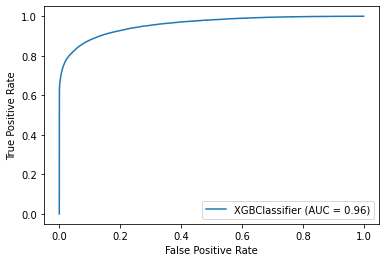

In [ ]:
fpr, tpr, thresholds = roc_curve(y_valid,y_valid_predict)
plot_roc_curve(XGB_best,X_valid,y_valid)

In [ ]:
roc_auc_score(y_valid,model_XGB_best.predict_proba(X_valid)[:,1])

0.9576583005353255

In [ ]:
y_valid

array([0, 1, 0, ..., 0, 1, 1])

In [ ]:
model_XGB_best.predict_proba(X_valid)

array([[9.4015294e-01, 5.9847057e-02],
       [3.8020790e-02, 9.6197921e-01],
       [7.8990042e-01, 2.1009959e-01],
       ...,
       [6.1641490e-01, 3.8358507e-01],
       [4.6597046e-01, 5.3402954e-01],
       [4.0644407e-04, 9.9959356e-01]], dtype=float32)

In [ ]:
classification_report(y_train,y_train_predict,output_dict = True)["1"]

{'f1-score': 0.8966635901262691,
 'precision': 0.9304023930035618,
 'recall': 0.8652860738000667,
 'support': 131924}

In [ ]:
target_probability = model_XGB_best.predict_proba(X_test)
target_probability

array([[0.8638872 , 0.13611284],
       [0.38686603, 0.61313397],
       [0.9556248 , 0.04437518],
       ...,
       [0.14218616, 0.85781384],
       [0.8374274 , 0.16257259],
       [0.5446041 , 0.45539588]], dtype=float32)

In [ ]:
target_probability_1 = target_probability[:,-1]
target_probability_1

array([0.13611284, 0.61313397, 0.04437518, ..., 0.85781384, 0.16257259,
       0.45539588], dtype=float32)

In [ ]:
output_prob = pd.DataFrame(ds_test["id"])

In [ ]:
output_prob["target"]= target_probability_1


In [ ]:
output_prob

,id,target
0,5,0.136113
1,6,0.613134
2,8,0.044375
3,9,0.188573
4,11,0.150575
...,...,...
199995,499983,0.873349
199996,499984,0.043038
199997,499987,0.857814
199998,499994,0.162573


In [ ]:
target_probability_1 = target_probability[:,1]
target_probability_1

array([0.13611284, 0.61313397, 0.04437518, ..., 0.85781384, 0.16257259,
       0.45539588], dtype=float32)

In [ ]:
output_prob_1 = pd.DataFrame(ds_test["id"])

In [ ]:
output_prob_1["target"]= target_probability_1

In [ ]:
output_prob_1

,id,target
0,5,0.136113
1,6,0.613134
2,8,0.044375
3,9,0.188573
4,11,0.150575
...,...,...
199995,499983,0.873349
199996,499984,0.043038
199997,499987,0.857814
199998,499994,0.162573


In [ ]:
output_prob_1.to_csv("/content/drive/MyDrive/Tabular Playground Series Mar 2021/output_probability_1.csv")